# Part II - (Prosper's Criteria for Giving Loan)
## by (Damilare Ayoola)



## Investigation Overview

> I want to investigate on the properties that Prosper look for before giving loan


## Dataset Overview

> This data set contains 113,937 loans with 81 variables on each loan but will be reduced to 13 variables that will aid our analysis/visualization, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
prosperLoan = pd.read_csv('prosperLoanData.csv')
print(prosperLoan.shape)
print(prosperLoan.dtypes)
#prosperLoan.head()

(113937, 81)
ListingKey                      object
ListingNumber                    int64
ListingCreationDate             object
CreditGrade                     object
Term                             int64
                                ...   
PercentFunded                  float64
Recommendations                  int64
InvestmentFromFriendsCount       int64
InvestmentFromFriendsAmount    float64
Investors                        int64
Length: 81, dtype: object


In [3]:
#Reduce the dataset to the ones needed for this project
prosperLoan = prosperLoan[['Term', 'LoanStatus', 'BorrowerAPR', 'BorrowerRate', 'ProsperScore', 'EmploymentStatus', 
         'CreditScoreRangeLower', 'CreditScoreRangeUpper', 'IncomeRange', 'TotalProsperLoans', 'LoanOriginalAmount', 
         'LoanOriginationDate', 'MonthlyLoanPayment']]

In [4]:
print(prosperLoan.shape)
print(prosperLoan.dtypes)
#prosperLoan.head()

(113937, 13)
Term                       int64
LoanStatus                object
BorrowerAPR              float64
BorrowerRate             float64
ProsperScore             float64
EmploymentStatus          object
CreditScoreRangeLower    float64
CreditScoreRangeUpper    float64
IncomeRange               object
TotalProsperLoans        float64
LoanOriginalAmount         int64
LoanOriginationDate       object
MonthlyLoanPayment       float64
dtype: object


In [5]:
# Convert IncomeRange to ordinal categorical 
ordinal_var_dict = {'IncomeRange':['$0','$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+'],
                   'EmploymentStatus': ['Employed','Self-employed','Full-time','Part-time','Retired','Not employed',]
                   }
for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = ordinal_var_dict[var])
    prosperLoan[var] = prosperLoan[var].astype(ordered_var)


## Employment Status
> This seems to be the number 1 criteria of Prosper. There need to be an assurance for Prosper that the loan will be repayed. 

> Employed and Full-time Employment category seems to be the only ones that gives Prosper assurance.**


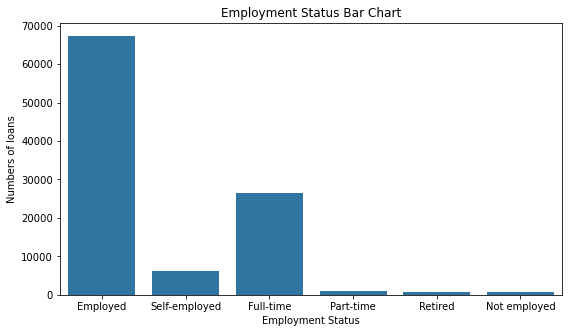

In [6]:
plt.figure(figsize=[9, 5])
base_color = sb.color_palette()[0]
sb.countplot(data=prosperLoan, x='EmploymentStatus', color=base_color);
plt.title('Employment Status Bar Chart')
plt.xlabel('Employment Status')
plt.ylabel('Numbers of loans');

## Employment Status vs. Income Range

> The Employment Status and Income Range shows the distribution of how the loans were given. We can see that Employed and Full-time earns more money than the other category, and they were given more loan compare to other catherogy.

> Income Range from $25k upward gets more access to loan as well.
These gives Prosper higher percentage of assurance that their loans will be paid back

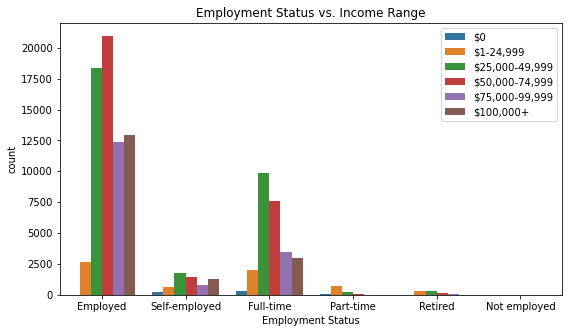

In [7]:
plt.figure(figsize=[9, 5])
sb.countplot(data = prosperLoan, x = 'EmploymentStatus', hue = 'IncomeRange');
plt.title('Employment Status vs. Income Range')
plt.legend(loc = "upper right")
plt.xlabel('Employment Status');

## Loan Status vs Employment Status
> This shows that the  `Employed` and `Full-time` have also been the categories paying up their loans



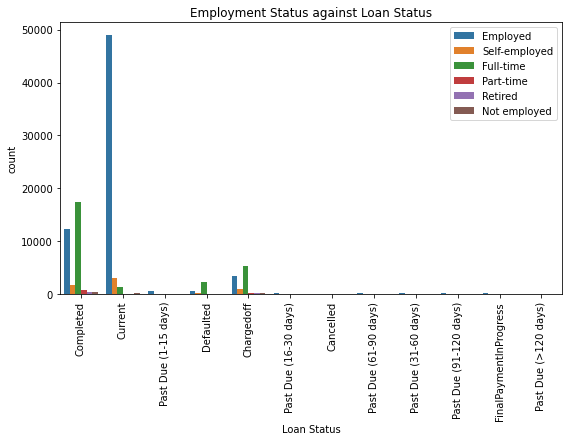

In [8]:
plt.figure(figsize=[9, 5])
sb.countplot(data = prosperLoan, x = 'LoanStatus', hue = 'EmploymentStatus');
plt.xticks(rotation=90);
plt.legend(loc = "upper right")
plt.title('Employment Status against Loan Status')
plt.xlabel('Loan Status');

In [9]:
jupyter nbconvert Part_II_Explanatory.ipynb --to slides --post serve --no-input --no-prompt